# Seasonal Time Series

## Seasonal decompose

You can think of a time series as being composed of trend, seasonal and residual components. This can be a good way to think about the data when you go about modeling it. If you know the period of the time series you can decompose it into these components.

In this exercise you will decompose a time series showing the monthly milk production per cow in the USA. This will give you a clearer picture of the trend and the seasonal cycle. Since the data is monthly you will guess that the seasonality might be 12 time periods, however this won't always be the case.

c:\users\user\anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead


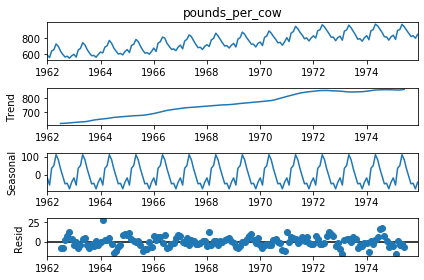

In [1]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.arima_process import arma_generate_sample
# Import the ARMA model
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose
        
milk_production = pd.read_csv('milk_production.csv',
        index_col='date',
            parse_dates=True)
        
# milk_production.index= pd.to_datetime(milk_production["date"])
# print(milk_production)
# Perform additive decomposition
decomp = seasonal_decompose(milk_production["pounds_per_cow"], 
                            freq=12)

# Plot decomposition
decomp.plot()
plt.show()


## Seasonal ACF and PACF


In [2]:
water = pd.DataFrame([24963, 27380, 32588, 25511, 32313, 31858, 23929, 30452, 28688, 24936, 34078, 25601, 27238, 28126, 32845, 26001, 29377, 33275, 28720, 31159, 23885, 29233, 39031, 25918, 27885, 28695, 30102, 30110, 32692, 28224, 30919, 30229, 28395, 32274, 32992, 26956, 28996, 28154, 27478, 32720, 30466, 27618, 29949, 29821, 28098, 32021, 29145, 29428, 28863, 28687, 33043, 29092, 28731, 34249, 31617, 30542, 30420, 32422, 33084, 29167, 30164, 32655, 34654, 29570, 29096, 33523, 30801, 35274, 31433, 32584, 32625, 27569, 36909, 30822, 36301, 32327, 33149, 33027, 29178, 35109, 29988, 38742, 38934, 28986, 35780, 31676, 35069, 33238, 36737, 32407, 33399, 37719, 30027, 37644, 39654, 28707, 28942, 31080, 26923, 32836, 32000, 30802, 31344, 32409, 33971, 33584, 30248, 30469, 30505, 31112, 31784, 31682, 30539, 36502, 32139, 30369, 36918, 32316, 33333, 30016, 30559, 31478, 35299, 30442, 32145, 35360, 34610, 33873, 37132, 32695, 34048, 32256, 27517, 33454, 38539, 31775], columns = ['water_consumers'])

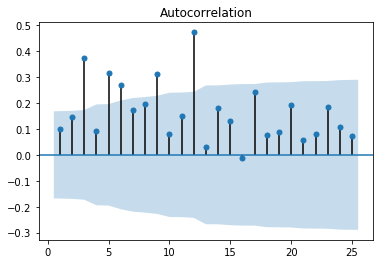

In [3]:
# Plot the ACF of the 'water_consumers' column of the time series up to 25 lags.

fig, ax1 = plt.subplots()

# Plot the ACF on ax1
plot_acf(water["water_consumers"], lags = 25, zero=False,  ax=ax1)

# Show figure
plt.show()

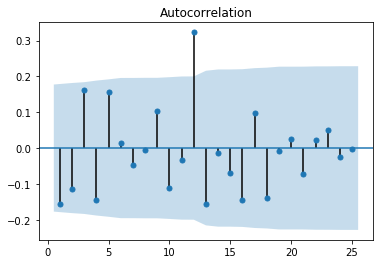

In [4]:
# Subtract the rolling mean
water_2 = water - water.rolling(15).mean()

# Drop the NaN values
water_2 = water_2.dropna()

# Create figure and subplots
fig, ax1 = plt.subplots()

# Plot the ACF
plot_acf(water_2['water_consumers'], lags=25, zero=False, ax=ax1)

# Show figure
plt.show()

## Fitting SARIMA models

Fitting SARIMA models is the beginning of the end of this journey into time series modeling.

It is important that you get to know your way around the SARIMA model orders and so that's what you will focus on here.

In this exercise, you will practice fitting different SARIMA models to a set of time series.

In [5]:
df1 = pd.DataFrame([-259.9, 651.9, 53.5, -418.1, 459.3, 2572.0, 897.8, -136.5, 793.8, -1.8, -464.6, 562.6, 2650.0, 807.0, -369.5, 894.8, -196.3, -615.0, 812.5, 3044.6, 762.3, -445.1, 984.9, -201.1, -879.6, 736.5, 3108.4, 533.9, -538.8, 1192.0, -349.8, -1202.7, 861.1, 2767.1, 766.8, -183.2, 1267.3, -502.6, -1355.3, 946.8, 3064.6, 780.5, 72.8, 1206.5, -370.5, -1378.2, 774.6, 3170.4, 1042.4, 279.2, 1376.2, -195.8, -1643.7, 941.6, 3158.9, 1250.8, 281.9, 1470.7, 46.9, -1425.1, 564.7, 2764.6, 1461.1, 227.3, 1779.1, 267.2, -1499.6, 692.5, 2291.8, 1406.8, -229.3, 1617.0, 481.4, -1513.9, 560.5, 1803.3, 1207.1, -341.3, 1355.5, 553.4, -1764.5, 259.4, 1606.9, 1278.8, -261.9, 1208.2, 851.6, -1609.9, 348.3, 1380.7], columns = ['Y'])
df2 = pd.DataFrame([-1664.3, -1797.4, -2108.9, -2611.2, -3025.8, -2766.8, -2867.3, -3411.7, -3704.7, -3790.3, -4503.6, -4315.4, -5273.4, -5383.0, -5747.1, -6112.5, -6638.5, -6563.1, -6382.7, -6961.3, -6970.9, -7262.2, -6999.7, -7267.9, -6980.6, -7279.2, -7171.9, -7617.8, -7089.1, -7779.4, -7411.7, -8516.6, -8558.8, -8915.4, -8828.1, -8621.7, -8390.8, -8545.1, -8154.6, -8189.9, -8266.1, -8347.1, -8514.3, -8151.6, -8305.7, -7907.7, -7818.0, -7146.5, -6911.6, -6455.4, -6029.9, -6082.8, -5903.3, -5473.2, -5449.2, -5426.6, -5776.6, -5297.3, -5650.8, -5276.0, -4926.7, -4835.7, -4661.1, -4122.2, -3942.5, -3809.0, -3468.5, -3626.3, -3252.4, -3382.5, -3248.6, -3328.3, -3460.1, -3613.4, -3614.8, -3837.4, -3756.4, -3664.5, -3676.9, -4159.4], columns = ['Y'])
df3 = pd.DataFrame([2141.5, 1557.6, 2715.1, 1313.5, 777.6, 2476.4, 2640.6, 2415.6, 1843.9, 1946.8, 2190.8, 2422.0, 5287.3, 4873.0, 6134.6, 4659.4, 3984.0, 5699.3, 6003.3, 5810.2, 5422.5, 5585.2, 5849.1, 6151.7, 9203.4, 8623.9, 9859.8, 8293.2, 7491.6, 9013.1, 9285.1, 9148.3, 8582.1, 8788.6, 9045.2, 9375.2, 12368.8, 11716.1, 12989.1, 11395.0, 10676.0, 12216.7, 12579.4, 12396.4, 12041.2, 12356.7, 12554.1, 12901.8, 15781.6, 15106.7, 16339.1, 14705.4, 14039.6, 15448.2, 15628.4, 15342.5, 14863.2, 15165.4, 15369.0, 15733.9, 18507.2, 17757.6, 18980.3, 17364.9, 16977.9, 18468.0, 18756.5, 18606.6, 18228.3, 18481.9, 18543.6, 18938.8, 21818.7, 21081.8, 22313.7, 20751.2, 20316.2, 21761.6, 21861.8, 21511.0, 21102.3, 21404.7, 21528.0, 22004.0, 25033.4, 24455.4, 25831.4, 24554.4, 24371.8, 25742.6, 25772.6, 25365.1, 24976.2, 25299.7, 25521.3, 26135.7, 29183.6, 28621.2, 30025.4, 28766.1], columns = ['Y'])

In [6]:
# Create a SARIMAX model
model = SARIMAX(df1, order=(1,0,0), seasonal_order=(1,1,0,7))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())


                                     SARIMAX Results                                     
Dep. Variable:                                 Y   No. Observations:                   90
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 7)   Log Likelihood                -556.240
Date:                           Sat, 29 Feb 2020   AIC                           1118.479
Time:                                   15:31:05   BIC                           1125.736
Sample:                                        0   HQIC                          1121.395
                                            - 90                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1032      0.103      1.002      0.316      -0.099       0.305
ar.S.L7        0.2781      0.104      2.666

In [7]:
# Create a SARIMAX model
model = SARIMAX(df2, order = (2,1,1), seasonal_order = (1,0,0,4))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())


                                     SARIMAX Results                                      
Dep. Variable:                                  Y   No. Observations:                   80
Model:             SARIMAX(2, 1, 1)x(1, 0, [], 4)   Log Likelihood                -560.338
Date:                            Sat, 29 Feb 2020   AIC                           1130.677
Time:                                    15:31:05   BIC                           1142.524
Sample:                                         0   HQIC                          1135.423
                                             - 80                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2701      0.162      1.671      0.095      -0.047       0.587
ar.L2          0.5015      0.110   

In [8]:
# Create a SARIMAX model
model = SARIMAX(df3, order = (1,1,0), seasonal_order = (0,1,1,12))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())


                                      SARIMAX Results                                       
Dep. Variable:                                    Y   No. Observations:                  100
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -521.373
Date:                              Sat, 29 Feb 2020   AIC                           1048.746
Time:                                      15:31:06   BIC                           1056.144
Sample:                                           0   HQIC                          1051.725
                                              - 100                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4236      0.090      4.719      0.000       0.248       0.600
ma.S.L12      -0.08

## Choosing SARIMA order

In this exercise you will find the appropriate model order for a new set of time series. This is monthly series of the number of employed persons in Australia (in thousands). The seasonal period of this time series is 12 months.

You will create non-seasonal and seasonal ACF and PACF plots and use the table below to choose the appropriate model orders.



In [9]:
aus_employment = pd.DataFrame([5985.7, 6040.6, 6054.2, 6038.3, 6031.3, 6036.1, 6005.4, 6024.3, 6045.9, 6033.8, 6125.4, 5971.3, 6050.7, 6096.2, 6087.7, 6075.6, 6095.7, 6103.9, 6078.5, 6157.8, 6164.0, 6188.8, 6257.2, 6112.9, 6207.2, 6278.7, 6224.9, 6273.4, 6269.9, 6314.1, 6281.4, 6360.0, 6320.2, 6342.0, 6426.6, 6253.0, 6356.5, 6428.1, 6426.3, 6412.4, 6413.9, 6425.3, 6393.7, 6502.7, 6445.3, 6433.3, 6506.9, 6355.5, 6432.4, 6497.4, 6431.6, 6440.9, 6414.3, 6425.9, 6379.3, 6443.5, 6421.1, 6367.0, 6370.2, 6172.2, 6264.1, 6310.4, 6254.5, 6272.8, 6266.5, 6295.0, 6241.1, 6358.2, 6336.2, 6377.5, 6456.4, 6251.4, 6365.4, 6503.2, 6477.6, 6489.7, 6499.0, 6528.7, 6466.1, 6579.8, 6553.2, 6576.1, 6636.0, 6452.4, 6595.7, 6657.4, 6588.8, 6658.0, 6659.4, 6703.4, 6675.6, 6814.7, 6771.1, 6882.0, 6910.8, 6753.6, 6861.9, 6961.9, 6997.9, 6979.0, 7007.7, 6991.5, 6918.6, 7040.6, 7030.4, 7034.2, 7116.8, 6902.5, 7022.3, 7133.4, 7109.6, 7103.6, 7128.9, 7175.6, 7092.3, 7186.5, 7177.4, 7182.2, 7330.7, 7169.4, 7247.4, 7397.4, 7383.4, 7354.9, 7378.3, 7383.1, 7353.4, 7503.2, 7477.3, 7508.7, 7622.9, 7424.9, 7569.7, 7638.3, 7683.2, 7729.3, 7720.5, 7751.8, 7727.6, 7854.4, 7817.8, 7870.7, 7941.6, 7712.6, 7809.1, 7877.5, 7894.3, 7916.1, 7910.0, 7932.9, 7825.0, 7925.5, 7870.5, 7849.9, 7941.2, 7668.8, 7739.3, 7746.5, 7750.5], columns = ['people_employed'])

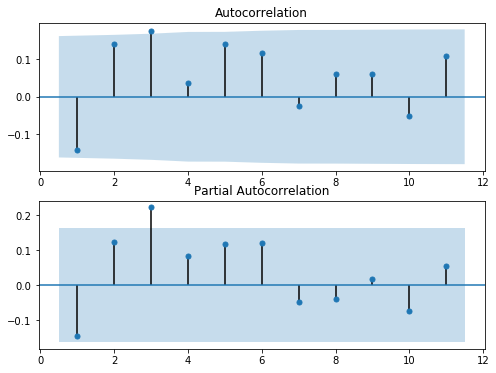

In [10]:
# Take the first and seasonal differences and drop NaNs
aus_employment_diff = aus_employment.diff().diff(12).dropna()

# Plot the ACF and PACF of aus_employment_diff up to 11 lags.
# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, lags= 11, zero=False, ax=ax1)

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, lags= 11, zero=False, ax=ax2)

plt.show()

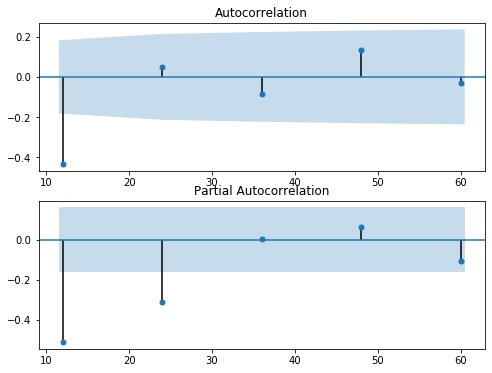

In [11]:
# Make a list of the first 5 seasonal lags and assign the result to lags.
# Plot the ACF and PACF of aus_employment_diff for the first 5 seasonal lags.

# Make list of lags
lags = [12, 24, 36, 48, 60]

# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, lags= lags, zero=False, ax=ax1)

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, lags= lags, zero=False, ax=ax2)

plt.show()

## SARIMA vs ARIMA forecasts

In this exercise, you will see the effect of using a SARIMA model instead of an ARIMA model on your forecasts of seasonal time series.

Two models, an ARIMA(3,1,2) and a SARIMA(0,1,1)(1,1,1)12, have been fit to the Wisconsin employment time series. These were the best ARIMA model and the best SARIMA model available according to the AIC.

In the exercise you will use these two models to make dynamic future forecast for 25 months and plot these predictions alongside held out data for this period, wisconsin_test.

The fitted ARIMA results object and the fitted SARIMA results object are available in your environment as arima_results and sarima_results.

In [12]:
import numpy

dates = [numpy.datetime64('1973-10-01T00:00:00.000000000'), numpy.datetime64('1973-11-01T00:00:00.000000000'), numpy.datetime64('1973-12-01T00:00:00.000000000'), numpy.datetime64('1974-01-01T00:00:00.000000000'), numpy.datetime64('1974-02-01T00:00:00.000000000'), numpy.datetime64('1974-03-01T00:00:00.000000000'), numpy.datetime64('1974-04-01T00:00:00.000000000'), numpy.datetime64('1974-05-01T00:00:00.000000000'), numpy.datetime64('1974-06-01T00:00:00.000000000'), numpy.datetime64('1974-07-01T00:00:00.000000000'), numpy.datetime64('1974-08-01T00:00:00.000000000'), numpy.datetime64('1974-09-01T00:00:00.000000000'), numpy.datetime64('1974-10-01T00:00:00.000000000'), numpy.datetime64('1974-11-01T00:00:00.000000000'), numpy.datetime64('1974-12-01T00:00:00.000000000'), numpy.datetime64('1975-01-01T00:00:00.000000000'), numpy.datetime64('1975-02-01T00:00:00.000000000'), numpy.datetime64('1975-03-01T00:00:00.000000000'), numpy.datetime64('1975-04-01T00:00:00.000000000'), numpy.datetime64('1975-05-01T00:00:00.000000000'), numpy.datetime64('1975-06-01T00:00:00.000000000'), numpy.datetime64('1975-07-01T00:00:00.000000000'), numpy.datetime64('1975-08-01T00:00:00.000000000'), numpy.datetime64('1975-09-01T00:00:00.000000000'), numpy.datetime64('1975-10-01T00:00:00.000000000')]

In [13]:
wisconsin_test = pd.DataFrame([374.5, 380.2, 384.6, 360.6, 354.4, 357.4, 367.0, 375.7, 381.0, 381.2, 383.0, 384.3, 387.0, 391.7, 396.0, 374.0, 370.4, 373.2, 381.1, 389.9, 394.6, 394.0, 397.0, 397.2, 399.4], columns = ['number_in_employment'])


In [14]:
wisconsin_test.index = dates


c:\users\user\anaconda3\envs\python3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\user\anaconda3\envs\python3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\user\anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


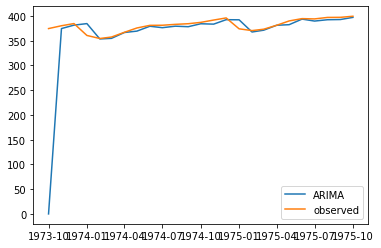

In [15]:
# Create a SARIMAX model
model = SARIMAX(wisconsin_test['number_in_employment'], order = (3, 1, 2))

# Fit the model
results = model.fit()

# Create ARIMA mean forecast
arima_mean = results.predict(0)

plt.plot(dates, arima_mean, label='ARIMA')
plt.plot(wisconsin_test, label='observed')
plt.legend()
plt.show()


## Automated model selection

The pmdarima package is a powerful tool to help you choose the model orders. You can use the information you already have from the identification step to narrow down the model orders which you choose by automation.

Remember, although automation is powerful, it can sometimes make mistakes that you wouldn't. It is hard to guess how the input data could be imperfect and affect the test scores.

In this exercise you will use the pmdarima package to automatically choose model orders for some time series datasets.

Three datasets are available in your environment as df1, df2 and df3.

In [16]:
# Import pmdarima as pm
import pmdarima as pm
import warnings
warnings.filterwarnings('ignore')


In [17]:
# Model the time series df1 with period 7 days and set first order seasonal differencing and no non-seasonal differencing.

# Create auto_arima model
model1 = pm.auto_arima(df1,
                      seasonal=True, m=7,
                      d=0, D=1, 
                 	  max_p=2, max_q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model1.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (2, 0, 2)x(1, 1, 1, 7) (constant=True); AIC=1125.228, BIC=1144.579, Time=1.396 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 7) (constant=True); AIC=1124.429, BIC=1129.266, Time=0.005 seconds
Fit ARIMA: (1, 0, 0)x(1, 1, 0, 7) (constant=True); AIC=1120.428, BIC=1130.103, Time=0.287 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 1, 7) (constant=True); AIC=1122.212, BIC=1131.887, Time=0.181 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 7) (constant=False); AIC=1122.592, BIC=1125.011, Time=0.020 seconds
Fit ARIMA: (1, 0, 0)x(0, 1, 0, 7) (constant=True); AIC=1125.044, BIC=1132.300, Time=0.040 seconds
Fit ARIMA: (1, 0, 0)x(2, 1, 0, 7) (constant=True); AIC=1119.904, BIC=1131.998, Time=0.536 seconds
Fit ARIMA: (1, 0, 0)x(2, 1, 1, 7) (constant=True); AIC=1121.786, BIC=1136.299, Time=0.673 seconds
Fit ARIMA: (1, 0, 0)x(1, 1, 1, 7) (constant=True); AIC=1120.958, BIC=1133.052, Time=0.263 seconds
Fit ARIMA: (0, 0, 0)x(2, 1, 0, 7) (constant=True); AIC=1119.061, BIC=1128.

In [18]:
# Create a model to fit df2. Set the non-seasonal differencing to 1, the trend to a constant and set no seasonality.
# Create model
model2 = pm.auto_arima(df2,
                      d=1,
                      seasonal=False,
                      trend="c",
                 	  max_p=2, max_q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model2.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1131.953, BIC=1146.170, Time=0.187 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1153.963, BIC=1158.702, Time=0.013 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1155.355, BIC=1162.464, Time=0.044 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1155.747, BIC=1162.855, Time=0.027 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1153.963, BIC=1158.702, Time=0.009 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1136.102, BIC=1147.949, Time=0.252 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1130.990, BIC=1142.838, Time=0.108 seconds
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1149.019, BIC=1158.497, Time=0.200 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1132.523, BIC=1142.001, Time=0.123 seconds
Total fit time: 0.987 seconds
                               SARIMAX Resul

In [19]:
#Fit a SARIMAX(p,1,q)(P,1,Q)7 model to the data setting start_p, start_q, max_p, max_q, max_P and max_Q to 1.

# Create model for SARIMAX(p,1,q)(P,1,Q)7
model3 = pm.auto_arima(df3,
                      seasonal=True, m=7,
                      d=1, D=1, 
                      start_p=1, start_q=1,
                      max_p=1, max_q=1,
                      max_P=1, max_Q=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model3.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(1, 1, 1, 7) (constant=True); AIC=1567.187, BIC=1582.317, Time=0.980 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 7) (constant=True); AIC=1595.825, BIC=1600.869, Time=0.001 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 0, 7) (constant=True); AIC=1585.202, BIC=1595.289, Time=0.223 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 1, 7) (constant=True); AIC=1572.741, BIC=1582.828, Time=0.604 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 7) (constant=False); AIC=1593.897, BIC=1596.419, Time=0.005 seconds
Fit ARIMA: (1, 1, 1)x(0, 1, 1, 7) (constant=True); AIC=1558.167, BIC=1570.776, Time=0.701 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (1, 1, 1)x(1, 1, 0, 7) (constant=True); A

## Saving and updating models

Once you have gone through the steps of the Box-Jenkins method and arrived at a model you are happy with, you will want to be able to save that model and also to incorporate new measurements when they are available. This is key part of putting the model into production.

In this exercise you will save a freshly trained model to disk, then reload it to update it with new data.

The model is available in your environment as model.

In [20]:
# Import the joblib package and use it to save the model to "candy_model.pkl".

# Import joblib
import joblib

# Set model name
filename = "candy_model.pkl"

# Pickle it
joblib.dump(model, filename)

['candy_model.pkl']

In [21]:
# Use the joblib package to load the model back in as loaded_model.

import joblib

# Set model name
filename = "candy_model.pkl"

# Load the model back in
loaded_model = joblib.load(filename)

In [25]:
# Create a SARIMAX model

candy = pd.read_csv('candy_production.csv',
        index_col='date',
            parse_dates=True)


model = SARIMAX(candy['IPG3113N'], order = (1, 0, 1), seasonal_order = (0, 1, 1, 12))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())


                                     SARIMAX Results                                      
Dep. Variable:                           IPG3113N   No. Observations:                  548
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -1475.284
Date:                            Sat, 29 Feb 2020   AIC                           2958.568
Time:                                    15:39:40   BIC                           2975.704
Sample:                                01-01-1972   HQIC                          2965.272
                                     - 08-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9241      0.018     51.092      0.000       0.889       0.960
ma.L1         -0.2640      0.045   

## SARIMA model diagnostics

Usually the next step would be to find the order of differencing and other model orders. However, this time it's already been done for you. The time series is best fit by a SARIMA(1, 1, 1)(0, 1, 1)12 model with an added constant.

In this exercise you will make sure that this is a good model by first fitting it using the SARIMAX class and going through the normal model diagnostics procedure.

In [28]:
co2 = pd.read_csv('co2.csv', parse_dates = ['date'])
co2 = co2.set_index('date')
co2.head()

,value
date,
1958-03-30,316.16
1958-03-31,316.40
1958-04-02,317.67
1958-04-03,317.76
1958-04-04,317.09


In [29]:
# Fit a SARIMA(1, 1, 1)(0, 1, 1)12 model to the data and set the trend to constant.

# Import model class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create model object
model = SARIMAX(co2, 
                order=(1,1,1), 
                seasonal_order=(0,1,1,12), 
                trend="c")
# Fit model
results = model.fit()

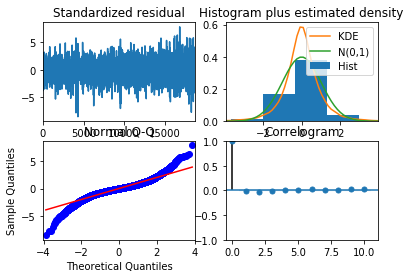

In [30]:
# Create the common diagnostics plots for the results object.

results.plot_diagnostics()
plt.show()

## SARIMA forecast

In the previous exercise you confirmed that a SARIMA (1,1,1) x (0,1,1)12 model was a good fit to the CO2 time series by using diagnostic checking.

Now its time to put this model into practice to make future forecasts. Climate scientists tell us that we have until 2030 to drastically reduce our CO2 emissions or we will face major challenges.

In this exercise, you will forecast the CO2 time series up to the year 2030 to find the CO2 levels if nothing changes.

In [31]:
# Create a forecast object for the next 136 steps, the number of months from the end of the time series until Jan 2030.
# Assign the predicted mean of the forecast to the variable mean.
# Assign the confidence intervals to the variable conf_int.

# Create forecast object
forecast_object = results.get_forecast(steps=136)

# Extract prediction mean
mean = forecast_object.predicted_mean

# Extract the confidence intervals
conf_int = forecast_object.conf_int()

# Extract the forecast dates
dates = mean.index

In [33]:
# Create forecast object
predicted_mean = results.predict(40)

# Extract the forecast dates
dates = predicted_mean.index

In [ ]:
# Shade the area between the confidence intervals conf_int.
plt.figure()

# Plot past CO2 levels
plt.plot(co2.index, co2, label='past')

# Plot the prediction means as line
plt.plot(dates, mean, label='predicted')

# Shade between the confidence intervals
plt.fill_between(dates, conf_int["lower CO2_ppm"], conf_int["upper CO2_ppm"], alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.show()